#Question1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from tempfile import TemporaryFile
import random

In [ ]:
env=gym.make('FrozenLake8x8-v0')

In [ ]:
state=env.reset()
for _ in range(1000):
  env.render()
  env.step(env.action_space.sample())
env.close()

Streaming output truncated to the last 5000 lines.
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFF

#Question2

In [ ]:
def policy(s):
  L=np.random.random()
  if L<=0.25 :
    return 0
  if 0.25<L<=0.5:
    return 1
  if 0.5<L<=0.75:
    return 2
  if L>0.75:
    return 3


In [ ]:
F=0
V=np.random.randn(1,64)
V[0,63]=0
N=[]
while True:
  
  N.clear()
  d=0
  for i in range(63):
    v=V[0,i]
    for a in range(4):
      A=env.env.P[i][a]
      for m in range(len(A)):
        B=0.25*A[m][0]*(A[m][2]+0.9*V[0,A[m][1]])
        F=B+F
    V[0,i]=F 
    N.append(abs(F-v))
    F=0
  d=max(max(N),d)  
  if d<0.00001:
    break

In [ ]:
print(np.reshape(V,(8,8)))


[[ 3.15465006e-05  4.84872927e-05  9.54503383e-05  2.07002024e-04
   4.50611935e-04  8.49289706e-04  1.40688438e-03  1.85301412e-03]
 [ 2.82753497e-05  4.03380315e-05  7.43060158e-05  1.67985130e-04
   4.94891889e-04  1.06546281e-03  2.14076390e-03  3.11974743e-03]
 [ 2.46411247e-05  2.83407960e-05  2.79677785e-05 -2.67622705e-05
   5.14265830e-04  1.24759355e-03  3.91967503e-03  6.74945532e-03]
 [ 2.59777071e-05  3.23688439e-05  5.07550576e-05  1.44561847e-04
   5.66114139e-04  3.94316028e-05  7.27895656e-03  1.62052823e-02]
 [ 2.76103588e-05  3.52518276e-05  1.87176485e-05  4.53387779e-05
   1.81113952e-03  5.03224723e-03  1.21817992e-02  4.17855963e-02]
 [ 2.61060508e-05  6.95274662e-05 -4.78743805e-05  5.60770755e-04
   2.40302407e-03  8.32861980e-03  3.80624155e-05  1.15536388e-01]
 [-1.56723112e-05 -4.45127624e-05 -1.16070291e-05  9.60993383e-05
  -1.99753947e-05  2.95381734e-02  2.44094850e-05  3.56131004e-01]
 [-2.56613198e-05 -3.64386395e-05 -4.47266095e-05 -8.98746054e-05
   

#Question3

In [ ]:
Policy=np.random.randint(low=0,high=4,size=(64,))
V=np.random.randn(1,64)
V[0,63]=0
V_zero=[]
r=0
g=0
old_Policy=np.zeros_like(Policy)

In [ ]:
 
for a in range(7):  
  F=0
  G=0
  g=g+1
  N=[]
  #print(np.reshape(Policy,(8,8)))
  #print(np.reshape(V,(8,8)))
  V_zero.append(V[0,0])
  while True:
    
    N.clear()
    d=0
    for i in range(63):
      v=V[0,i]
      A=env.env.P[i][Policy[i]]
      for m in range(len(A)):
          B=A[m][0]*(A[m][2]+0.9*V[0,A[m][1]])
          F=B+F
      V[0,i]=F 
      N.append(abs(F-v))
      F=0
    d=max(max(N),d)  
    if d<0.00001:
      break

  N.clear()
  Policy_stable=[]
  G=0
  F=0
  B=0
  while True:

    r=r+1
    for i in range(63):
      old_action=Policy[i]
      for a in range(4):
        A=env.env.P[i][a]
        for m in range(len(A)):
          B=A[m][0]*(A[m][2]+0.9*V[0,A[m][1]])
          G=G+B
        N.append(G)
        G=0 
      Policy[i]=np.argmax(N)
      N.clear() 
      if old_action!=Policy[i]:
        Policy_stable.append(False)
      if old_action==Policy[i]:
        Policy_stable.append(True)

    if any(Policy_stable)==True:
           break 
  

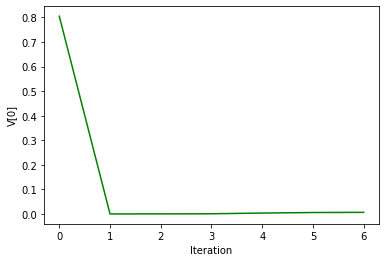

[0.8049377964193818, 2.6317129887931293e-06, 3.155660245647957e-05, 0.0006474742899284353, 0.003478123492559517, 0.005682206141092827, 0.0063829469639877425]


In [ ]:
plt.plot(V_zero,'g')
plt.xlabel('Iteration')
plt.ylabel('V[0]')
plt.show()
print(V_zero)
outfile = TemporaryFile()
np.save(outfile, Policy)


In [ ]:
print(np.reshape(V,(8,8)))
print(np.reshape(Policy,(8,8)))

[[ 6.40436933e-03  8.54465663e-03  1.22986230e-02  1.77885060e-02
   2.50816991e-02  3.24707156e-02  3.95712486e-02  4.29783548e-02]
 [ 6.01844325e-03  7.64163463e-03  1.09096197e-02  1.64254574e-02
   2.60535934e-02  3.61938785e-02  4.93546061e-02  5.73045196e-02]
 [ 5.08236817e-03  5.84792718e-03  6.77127880e-03 -3.75477277e-13
   2.55701294e-02  3.88210829e-02  6.76396250e-02  8.43559763e-02]
 [ 4.21473715e-03  4.76281402e-03  5.81569601e-03  7.85247315e-03
   2.03596940e-02 -6.97890462e-12  9.17548896e-02  1.29191028e-01]
 [ 3.16843644e-03  3.18923616e-03  2.70147965e-03  1.27522167e-11
   3.44432990e-02  6.19510978e-02  1.09019055e-01  2.09690877e-01]
 [ 1.85214149e-03  1.29307388e-11  8.05961617e-12  1.08502936e-02
   3.25004858e-02  6.30414556e-02 -1.02957801e-11  3.60087704e-01]
 [ 1.16225422e-03  3.95180071e-12  1.37453577e-03  3.66744880e-03
  -1.33729218e-11  1.15686630e-01  1.14243149e-11  6.30513777e-01]
 [ 8.66862240e-04  7.62617021e-04  9.15490086e-04  1.83991453e-12
   

#Question4

In [ ]:
nb_episodes=150
V_zero=[]
states=[]
rewards=[]
returns=np.zeros((1,64))
V=np.random.randn(1,64)
V[0,63]=0
k=np.zeros((1,64))
a=0.9
Policy=[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3 ,3, 2, 2, 2, 1, 3, 3, 0, 0, 2, 3, 2, 1, 3, 3, 3, 1, 0, 0, 2, 1, 3, 3, 3, 0, 2, 1, 3, 2, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0 ]


In [ ]:
for i in range(nb_episodes):
    state  = env.reset()
    states.append(state)
    V_zero.append(V[0,0])
    done = False
  
    while not done:
      
      action = Policy[state]
      
      state, reward, done, info = env.step(action)
     # print(state,reward,done,info)
      states.append(state)
      rewards.append(reward)
      if done:
        states.pop()
        G=0
        for y in range(len(rewards)-1,-1,-1):
           G=a*G+rewards[y]  #a is zarib takhfif
           #if states.count(states[y])=1
           returns[:,states[y]]=G
           k[:,states[y]]=k[:,states[y]]+1
           V[:,states[y]]=V[:,states[y]]+(1/k[:,states[y]])*(returns[:,states[y]]-V[:,states[y]])
        states.clear()
        rewards.clear() 
        #state=0
        #states.append(state)

In [ ]:
print(np.reshape(V,(8,8)))

[[ 5.32703007e-03  8.03163876e-03  1.18927512e-02  1.87289992e-02
   2.40641133e-02  3.59584456e-02  4.68588229e-02  4.72080427e-02]
 [ 5.31061430e-03  8.69025666e-03  1.19961045e-02  1.49479351e-02
   1.75334583e-02  3.26914236e-02  6.43291599e-02  7.20660904e-02]
 [ 1.71900891e-04  9.48911714e-03  1.64788958e-02 -2.54190877e-01
   1.58700530e-02  2.36846561e-02  8.10862865e-02  9.14372054e-02]
 [ 7.73554010e-04  5.20914466e-03  5.63013908e-03  3.36580353e-03
   9.69475912e-03 -6.49033115e-01  1.02517994e-01  1.33400908e-01]
 [-1.04956507e+00  1.05543452e+00 -6.37593445e-01 -1.47048889e+00
   3.34491682e-02  7.76837161e-02  1.25120514e-01  2.28442661e-01]
 [ 9.61451701e-01  6.17926991e-01  1.19731275e+00  0.00000000e+00
   3.56666078e-02  8.69559353e-02  2.53433591e+00  3.93276623e-01]
 [ 0.00000000e+00  8.37772375e-01  0.00000000e+00  0.00000000e+00
  -4.44130494e-02  1.29845235e-01  9.13462280e-02  6.71162225e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.77598121e-01
   

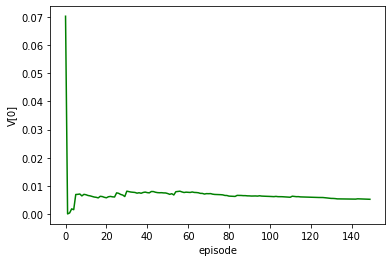

[0.07030270451532349, 6.998475131337804e-06, 0.0003574852448704093, 0.0018066433830354154, 0.001515249288997445, 0.006916838255639284, 0.006967147292096185, 0.007085342194248043, 0.006410547699557752, 0.006968477642421339, 0.006826263812984169, 0.006558567192867142, 0.00643244090069662, 0.006231537933315139, 0.0060156542820521625, 0.0059101165700937135, 0.005709773635514266, 0.006269426094041827, 0.00617619397605688, 0.0059110661066847005, 0.005744557202271047, 0.006113114084030145, 0.006228684335462205, 0.0060794237643269165, 0.006024828189363109, 0.007498074903438412, 0.007326438804043694, 0.006927543111018716, 0.006716051329975574, 0.00618930220605592, 0.00809546891236953, 0.00792210722643792, 0.007783124942504178, 0.007717155395616972, 0.007634658552718596, 0.007391471390141194, 0.007536062239811614, 0.007351055178221864, 0.007640011872448061, 0.007770775354985538, 0.0075795329451857725, 0.007496722934165262, 0.007972398497080624, 0.00795674640507453, 0.0077195665338294145, 0.00758

In [ ]:
plt.plot(V_zero,'g')
plt.xlabel('episode')
plt.ylabel('V[0]')
plt.show()
print(V_zero)

#Question5

In [ ]:
#off_policy MC prediction
Policy=[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3 ,3, 2, 2, 2, 1, 3, 3, 0, 0, 2, 3, 2, 1, 3, 3, 3, 1, 0, 0, 2, 1, 3, 3, 3, 0, 2, 1, 3, 2, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0 ]
Q=np.random.randn(64,4)
Q[63,:]=0
nb_episodes=90000
V_zero=[]
states=[]
rewards=[]
returns=np.zeros((1,64))
k=np.zeros((64,4))
a=0.7
actions=[]
s=[]

In [ ]:
def b(s):
  K=[0,1,2,3]
  N=Policy[s]
  L=np.random.random()
  if L<=0.8:
    return N
  if L>0.8:
    K.remove(N)
    H=random.choice(K)
    return H
      


In [ ]:
for i in range(nb_episodes):
    state  = env.reset()
    states.append(state)
   # V_zero.append(V[0,0])
    done = False
  
    while not done:
      
      action = b(state)
      
      state, reward, done, info = env.step(action)
     # print(state,reward,done,info)
      states.append(state)
      rewards.append(reward)
      actions.append(action)
      
      if done:
        states.pop()
        G=0
        w=1
        for y in range(len(rewards)-1,-1,-1):
           G=a*G+rewards[y]  #a is zarib takhfif
           #if states.count(states[y])=1
           #returns[:,states[y]]=G
           k[states[y],actions[y]]=k[states[y],actions[y]]+1
           #k[states[y],actions[y]]=k[states[y],actions[y]]+w
           Q[states[y],actions[y]]=Q[states[y],actions[y]]+(1/k[states[y],actions[y]])*(w*G-Q[states[y],actions[y]])
           #Q[states[y],actions[y]]=Q[states[y],actions[y]]+(w/k[states[y],actions[y]])*(G-Q[states[y],actions[y]])
           if Policy[states[y]]==actions[y]:
             z=1
             z1=0.8
           if Policy[states[y]]!=actions[y]: 
             z=0
             z1=0.06
           w=w*(z/z1)
           if w==0:
             break
        states.clear()
        rewards.clear() 
        actions.clear()
        #state=0
        #states.append(state)

In [ ]:

newpolicy=[]
print(Q)
for i in range(64):
  newpolicy.append(np.argmax(Q[i,:]))
print(np.reshape(newpolicy,(8,8)))
print(np.reshape(Policy,(8,8)))

In [ ]:
Policy=[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3 ,3, 2, 2, 2, 1, 3, 3, 0, 0, 2, 3, 2, 1, 3, 3, 3, 1, 0, 0, 2, 1, 3, 3, 3, 0, 2, 1, 3, 2, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0 ]
Q=np.random.randn(64,1)
Q[63,0]=0
nb_episodes=70000
V_zero=[]
states=[]
rewards=[]
returns=np.zeros((1,64))
#k=np.zeros((64,4))
a=0.7
actions=[]
s=[]
k=np.zeros((64,1))

In [ ]:
def b(s):
  K=[0,1,2,3]
  N=Policy[s]
  L=np.random.random()
  if L<=0.8:
    return N
  if L>0.8:
    K.remove(N)
    H=random.choice(K)
    return H
      

In [ ]:
for i in range(nb_episodes):
    state  = env.reset()
    states.append(state)
    V_zero.append(Q[0,0])
    done = False
  
    while not done:
      
      action = b(state)
      
      state, reward, done, info = env.step(action)
     # print(state,reward,done,info)
      states.append(state)
      rewards.append(reward)
      actions.append(action)
      
      if done:
        states.pop()
        G=0
        w=1
        for y in range(len(rewards)-1,-1,-1):
           G=a*G+rewards[y]  #a is zarib takhfif
           #if states.count(states[y])=1
           #returns[:,states[y]]=G
           k[states[y]]=k[states[y]]+1
           #k[states[y],actions[y]]=k[states[y],actions[y]]+w
           Q[states[y]]=Q[states[y]]+(1/k[states[y]])*(w*G-Q[states[y]])
          # Q[states[y],actions[y]]=Q[states[y],actions[y]]+(w/k[states[y],actions[y]])*(G-Q[states[y],actions[y]])
           if Policy[states[y]]==actions[y]:
             z=1
             z1=0.8
           if Policy[states[y]]!=actions[y]: 
             z=0
             z1=0.06
           w=w*(z/z1)
           if w==0:
             break
        states.clear()
        rewards.clear() 
        actions.clear()
        #state=0
        #states.append(state)

In [ ]:
print(np.reshape(Q,(8,8)))
plt.plot(V_zero)
plt.xlabel('episode')
plt.ylabel('V[0]')
plt.show()
print(V_zero)
#Q.round(4)
